In [1]:
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import time


/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:522: FutureWarning: Passing (type, 1) or 

# Data Preprocessing

((60000, 28, 28), (10000, 28, 28))
((60000, 28, 28, 1), (10000, 28, 28, 1))


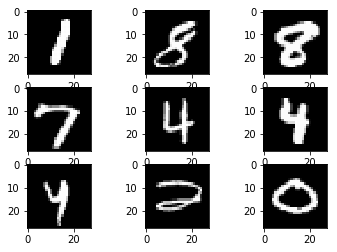

In [2]:

(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()
for i in range(1,10):
    plt.subplot(330+i)
    rand_int=np.random.randint(0,len(x_train))
    plt.imshow(x_train[rand_int],cmap=plt.get_cmap('gray'))
    
print((x_train.shape,x_test.shape))
x_train=x_train.reshape(x_train.shape[0],x_train[0].shape[0],x_train[0].shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test[0].shape[0],x_test[0].shape[1],1)
print((x_train.shape,x_test.shape))
input_shape=(x_train[0].shape[0],x_train[0].shape[1],1)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train=x_train/255
x_test=x_test/255

input_w, input_h = x_train[0].shape[0], x_train[0].shape[1]
batch_size=64
train_data_size=64000     
step=(train_data_size//batch_size)/10   
epochs=50

In [3]:
y_train=tf.keras.utils.to_categorical(y_train)
y_test=tf.keras.utils.to_categorical(y_test)

In [4]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [5]:
num_classes=y_test.shape[1]
num_pixels=x_train.shape[1]*x_train.shape[2]
print(num_classes,num_pixels)

10 784


# Data Augmentation

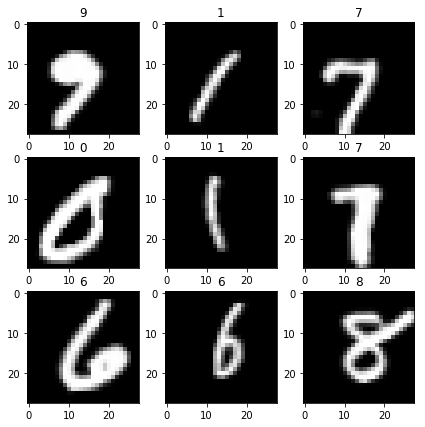

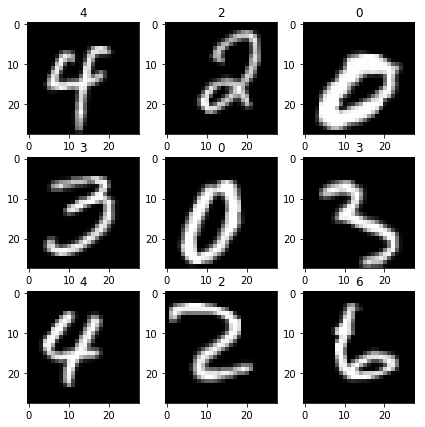

In [6]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=5,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        fill_mode='nearest')

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=5,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        fill_mode='nearest')

# fit parameters from data
train_datagen.fit(x_train)
test_datagen.fit(x_test)

# configure batch size and retrieve one batch of images
plt.figure(figsize=(7,7))

for x_batch, y_batch in train_datagen.flow(x_train, y_train, batch_size=9):
    # create a grid of 3x3 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.title(np.argmax(y_batch[i]))
        plt.imshow(x_batch[i].reshape(input_w, input_h), cmap=plt.get_cmap('gray'))# show the plot
    break
plt.figure(figsize=(7,7))
for x_batch, y_batch in test_datagen.flow(x_test, y_test, batch_size=9):
    # create a grid of 3x3 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.title(np.argmax(y_batch[i]))
        plt.imshow(x_batch[i].reshape(input_w, input_h), cmap=plt.get_cmap('gray'))# show the plot
    break

In [7]:
train_generator = train_datagen.flow(
    x_train,y_train,
    batch_size=batch_size,
    shuffle=False
)
        

test_generator = test_datagen.flow(
    x_test,y_test,
    batch_size=batch_size,
    shuffle=False
        )    

# Bilding and Compiling the Classifier Model

1- Create Sequential Model

2- Add layers

3- Compile the model (choose loss function, optimizer anf metrics

In [8]:
model=tf.keras.models.Sequential()

In [9]:
model.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),input_shape=input_shape,activation='relu'))
#model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(64,kernel_size=(5,5),activation='relu'))
#model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation='relu'))
#model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(num_classes,activation='softmax'))


In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 11, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7744)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               991360    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

# Train Classifier

In [11]:
i=time.time()
model_name="MNIST_Checkpoint"+str(int(i))+"_low_lr_batchNor.h5"
model_hist="MNIST_Checkpoint"+str(int(i))+"_low_lr_batchNor.pickle"



class NBatchLogger(tf.keras.callbacks.Callback):
    """
    A Logger that log average performance per `display` steps.
    """
    def get_loss_acc(self):
        return self.loss,self.acc
    def __init__(self,display):
        self.step = 0
        self.acc=[]
        self.loss=[]
        self.display = display
        self.metric_cache = {}

    def on_batch_end(self, batch, logs={}):
        self.step += 1
        for k in self.params['metrics']:
            if k in logs:
                self.metric_cache[k] = self.metric_cache.get(k, 0) + logs[k]
        if self.step % self.display == 0:
            metrics_log = ''
            for (k, v) in self.metric_cache.items():
                
                val = v / self.display
                if k=='acc':
                    self.acc.append(val)
                else:
                    self.loss.append(val)
                if abs(val) > 1e-3:
                    metrics_log += ' - %s: %.4f' % (k, val)
                    
                else:
                    metrics_log += ' - %s: %.4e' % (k, val)
                    
            print('\nstep: {}/{} ... {}'.format(self.step,
                                          self.params['steps'],
                                          metrics_log))
            self.metric_cache.clear()



out_batch = NBatchLogger(step)

checkpoint = tf.keras.callbacks.ModelCheckpoint(model_name,
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', # value being monitored for improvement
                          min_delta = 0, #Abs value and is the min change required before we stop
                          patience = 4, #Number of epochs we wait before stopping 
                          verbose = 1) #keeps the best weigths once stopped

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss',
                                                 factor = 0.001,
                                                 patience = 2,
                                                 verbose = 1, 
                                                 min_lr = 0.0005)

callbacks = [checkpoint,earlystop,reduce_lr,out_batch]

model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(0.001),metrics=['accuracy'])

history=model.fit_generator(train_generator,
                  steps_per_epoch=train_data_size//batch_size,
                  epochs=epochs,
                  verbose=1,
                  callbacks = callbacks,
                  validation_data=(x_test,y_test)
                 )


Epoch 1/50
  99/1000 [=>............................] - ETA: 1:16 - loss: 1.1082 - acc: 0.6307
step: 100/1000 ...  - acc: 0.6325 - loss: 1.1023
 199/1000 [====>.........................] - ETA: 49s - loss: 0.7852 - acc: 0.7402
step: 200/1000 ...  - acc: 0.8497 - loss: 0.4637
 298/1000 [=======>......................] - ETA: 38s - loss: 0.6326 - acc: 0.7935
step: 300/1000 ...  - acc: 0.8997 - loss: 0.3262
 399/1000 [==========>...................] - ETA: 30s - loss: 0.5471 - acc: 0.8239
step: 400/1000 ...  - acc: 0.9147 - loss: 0.2925
 499/1000 [=============>................] - ETA: 24s - loss: 0.4908 - acc: 0.8435
step: 500/1000 ...  - acc: 0.9217 - loss: 0.2661
 599/1000 [================>.............] - ETA: 19s - loss: 0.4493 - acc: 0.8575
step: 600/1000 ...  - acc: 0.9273 - loss: 0.2431
 698/1000 [===================>..........] - ETA: 14s - loss: 0.4169 - acc: 0.8679
step: 700/1000 ...  - acc: 0.9317 - loss: 0.2177
 799/1000 [======================>.......] - ETA: 9s - loss: 0.3

 298/1000 [=======>......................] - ETA: 37s - loss: 0.0770 - acc: 0.9765
step: 5300/1000 ...  - acc: 0.9734 - loss: 0.0826
 399/1000 [==========>...................] - ETA: 31s - loss: 0.0774 - acc: 0.9765
step: 5400/1000 ...  - acc: 0.9769 - loss: 0.0804
 499/1000 [=============>................] - ETA: 25s - loss: 0.0778 - acc: 0.9767
step: 5500/1000 ...  - acc: 0.9772 - loss: 0.0777
 598/1000 [================>.............] - ETA: 20s - loss: 0.0768 - acc: 0.9772
step: 5600/1000 ...  - acc: 0.9798 - loss: 0.0734
 698/1000 [===================>..........] - ETA: 14s - loss: 0.0751 - acc: 0.9777
step: 5700/1000 ...  - acc: 0.9803 - loss: 0.0640
 798/1000 [======================>.......] - ETA: 9s - loss: 0.0746 - acc: 0.9775 
step: 5800/1000 ...  - acc: 0.9762 - loss: 0.0704
 899/1000 [=========================>....] - ETA: 4s - loss: 0.0752 - acc: 0.9772
step: 5900/1000 ...  - acc: 0.9747 - loss: 0.0802
 999/1000 [============================>.] - ETA: 0s - loss: 0.0746 - 

 699/1000 [===================>..........] - ETA: 19s - loss: 0.0546 - acc: 0.9842
step: 10700/1000 ...  - acc: 0.9869 - loss: 0.0445
 799/1000 [======================>.......] - ETA: 14s - loss: 0.0540 - acc: 0.9845
step: 10800/1000 ...  - acc: 0.9858 - loss: 0.0502
 899/1000 [=========================>....] - ETA: 7s - loss: 0.0530 - acc: 0.9849
step: 10900/1000 ...  - acc: 0.9884 - loss: 0.0450
 999/1000 [============================>.] - ETA: 0s - loss: 0.0520 - acc: 0.9851
step: 11000/1000 ...  - acc: 0.9866 - loss: 0.0434

Epoch 00011: val_loss improved from 0.01873 to 0.01442, saving model to MNIST_Checkpoint1587233708_low_lr_batchNor.h5
1000/1000 [==============================] - 85s 85ms/step - loss: 0.0520 - acc: 0.9851 - val_loss: 0.0144 - val_acc: 0.9956
Epoch 12/50
  99/1000 [=>............................] - ETA: 38s - loss: 0.0525 - acc: 0.9837
step: 11100/1000 ...  - acc: 0.9836 - loss: 0.0527
 198/1000 [====>.........................] - ETA: 39s - loss: 0.0490 - acc: 

 999/1000 [============================>.] - ETA: 0s - loss: 0.0409 - acc: 0.9876
step: 16000/1000 ...  - acc: 0.9873 - loss: 0.0454

Epoch 00016: val_loss improved from 0.01438 to 0.01312, saving model to MNIST_Checkpoint1587233708_low_lr_batchNor.h5
1000/1000 [==============================] - 68s 68ms/step - loss: 0.0408 - acc: 0.9876 - val_loss: 0.0131 - val_acc: 0.9959
Epoch 17/50
  99/1000 [=>............................] - ETA: 1:42 - loss: 0.0409 - acc: 0.9888- 
step: 16100/1000 ...  - acc: 0.9889 - loss: 0.0408
 199/1000 [====>.........................] - ETA: 1:35 - loss: 0.0408 - acc: 0.9884
step: 16200/1000 ...  - acc: 0.9878 - loss: 0.0410
 299/1000 [=======>......................] - ETA: 1:25 - loss: 0.0425 - acc: 0.9874
step: 16300/1000 ...  - acc: 0.9855 - loss: 0.0455
 399/1000 [==========>...................] - ETA: 1:03 - loss: 0.0422 - acc: 0.9876
step: 16400/1000 ...  - acc: 0.9883 - loss: 0.0410
 499/1000 [=============>................] - ETA: 48s - loss: 0.0425 

 199/1000 [====>.........................] - ETA: 1:11 - loss: 0.0347 - acc: 0.9900
step: 21200/1000 ...  - acc: 0.9898 - loss: 0.0371
 299/1000 [=======>......................] - ETA: 1:01 - loss: 0.0329 - acc: 0.9906
step: 21300/1000 ...  - acc: 0.9920 - loss: 0.0302
 399/1000 [==========>...................] - ETA: 55s - loss: 0.0341 - acc: 0.9904
step: 21400/1000 ...  - acc: 0.9898 - loss: 0.0371
 499/1000 [=============>................] - ETA: 43s - loss: 0.0339 - acc: 0.9905
step: 21500/1000 ...  - acc: 0.9908 - loss: 0.0355
 599/1000 [================>.............] - ETA: 31s - loss: 0.0337 - acc: 0.9905
step: 21600/1000 ...  - acc: 0.9903 - loss: 0.0298
 698/1000 [===================>..........] - ETA: 22s - loss: 0.0333 - acc: 0.9906
step: 21700/1000 ...  - acc: 0.9917 - loss: 0.0310
 798/1000 [======================>.......] - ETA: 14s - loss: 0.0343 - acc: 0.9902
step: 21800/1000 ...  - acc: 0.9869 - loss: 0.0415
 898/1000 [=========================>....] - ETA: 7s - loss:

## Save Model and History

In [12]:
import pickle 

loss,acc=out_batch.get_loss_acc()
history.history['loss_steps']=loss
history.history['acc_steps']=acc


hist_name="mnist-"+str(np.max(history.history['val_acc'])*100)+".pickle"
pickle_out = open(hist_name,"wb")

hist_to_save=history.history
pickle.dump(hist_to_save, pickle_out)

pickle_out.close()

model_name="mnist-"+str(np.max(history.history['val_acc'])*100)+"%.h5"
model.save(model_name)

## Load Model and History

In [13]:
hist_name="mnist-"+str(np.max(history.history['val_acc'])*100)+".pickle"
pickle_in = open(hist_name,"rb")
saved_history = pickle.load(pickle_in)


model_name="mnist-"+str(np.max(history.history['val_acc'])*100)+"%.h5"
model=tf.keras.models.load_model(model_name)


loss_and_metrics=model.evaluate(x_test,y_test,verbose=1)
print("loss = "+str(loss_and_metrics[0])+"\nacc = "+str(loss_and_metrics[1]*100)+"%")

10000/10000 [==============================] - 3s 255us/step
loss = 0.014553328247571608
acc = 99.56%


# PLotting Loss and Accuracy Plots

## Accuracy per Epoch and Steps

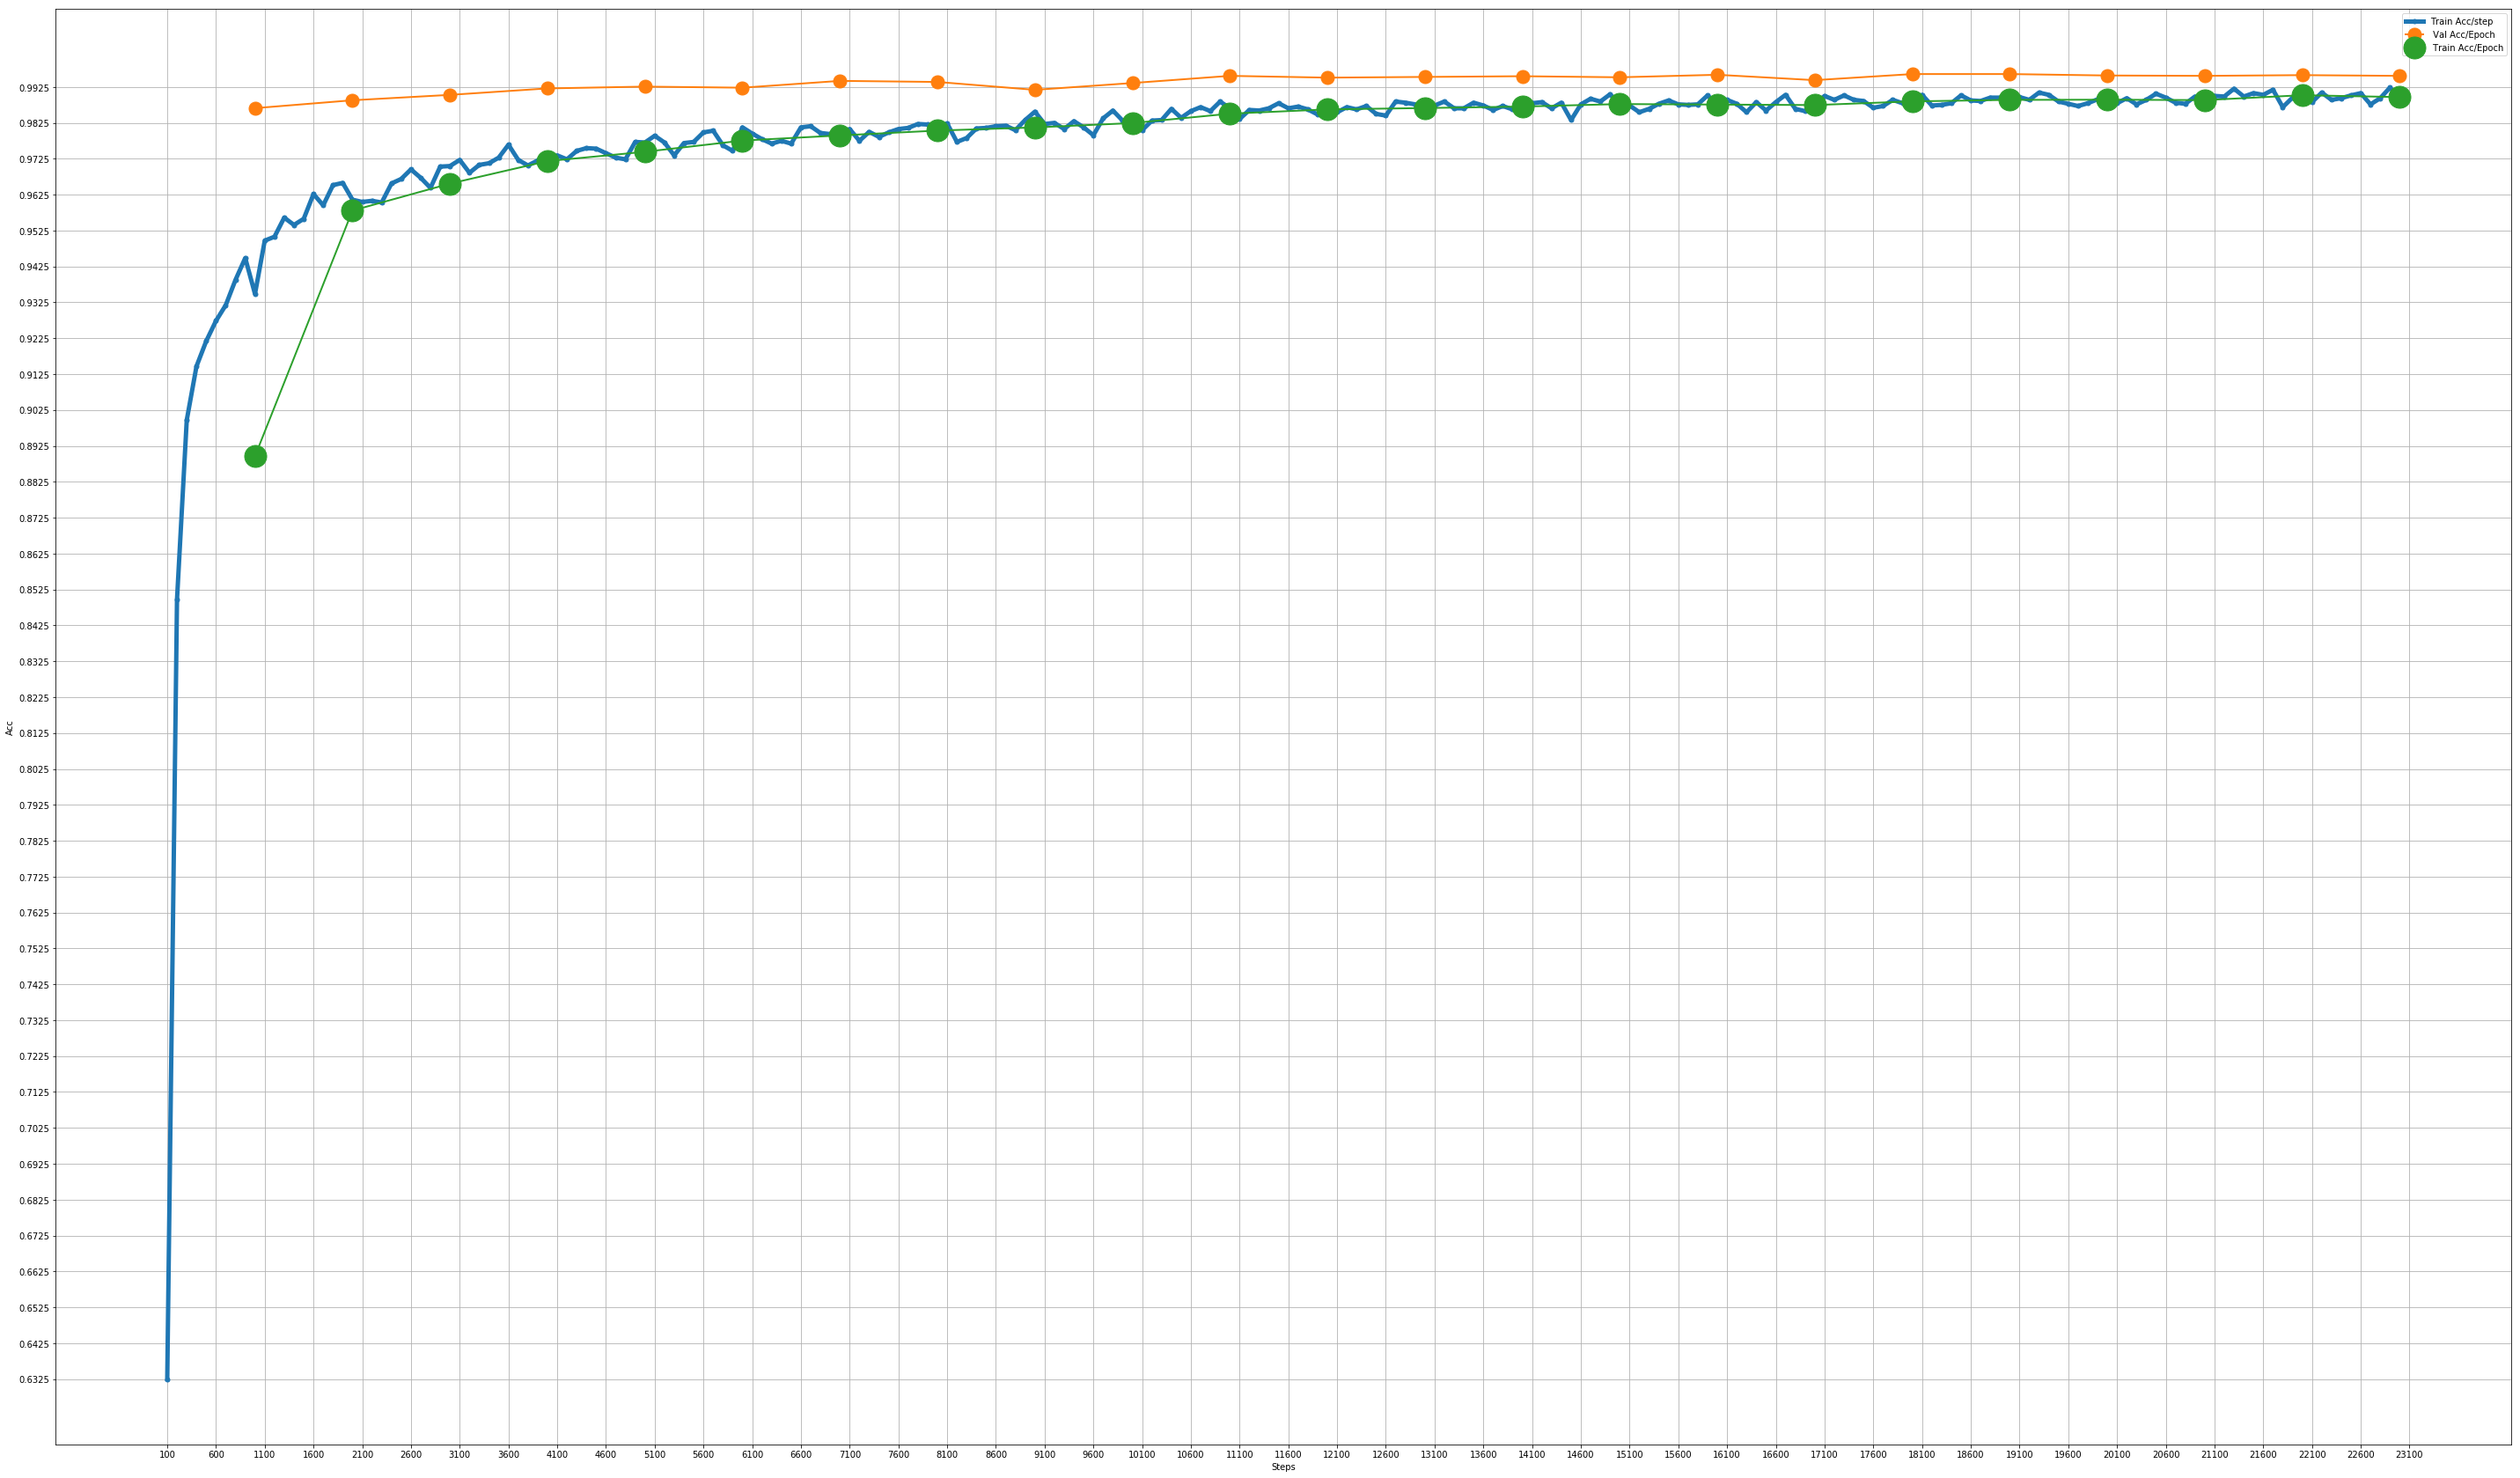

In [30]:
fig = plt.figure(figsize=(50,30))

history_dict=saved_history

val_acc=history_dict['val_acc']
train_acc=history_dict['acc']
val_loss=history_dict['val_loss']

lineAcc=plt.plot([i*step for i in range(1,len(acc)+1)],[j for j in acc],label="Train Acc/step")
lineValAcc=plt.plot([i*(train_data_size//batch_size) for i in range(1,len(val_acc)+1)],val_acc,label=" Val Acc/Epoch")
lineTrainAcc=plt.plot([i*(train_data_size//batch_size) for i in range(1,len(train_acc)+1)],train_acc,label=" Train Acc/Epoch")


plt.setp(lineAcc,lineWidth=5.0,marker='.',markersize=10.0)
plt.setp(lineValAcc,lineWidth=2.0,marker='.',markersize=30.0)
plt.setp(lineTrainAcc,lineWidth=2.0,marker='.',markersize=50.0)

plt.xlabel('Steps')
plt.ylabel('Acc')
plt.xticks(np.arange(step,len(acc)*(step+1),step*5))
plt.yticks(np.arange(np.min(acc),1,0.01))

plt.grid()
plt.legend()
plt.show()

## Loss per Epoch and Steps

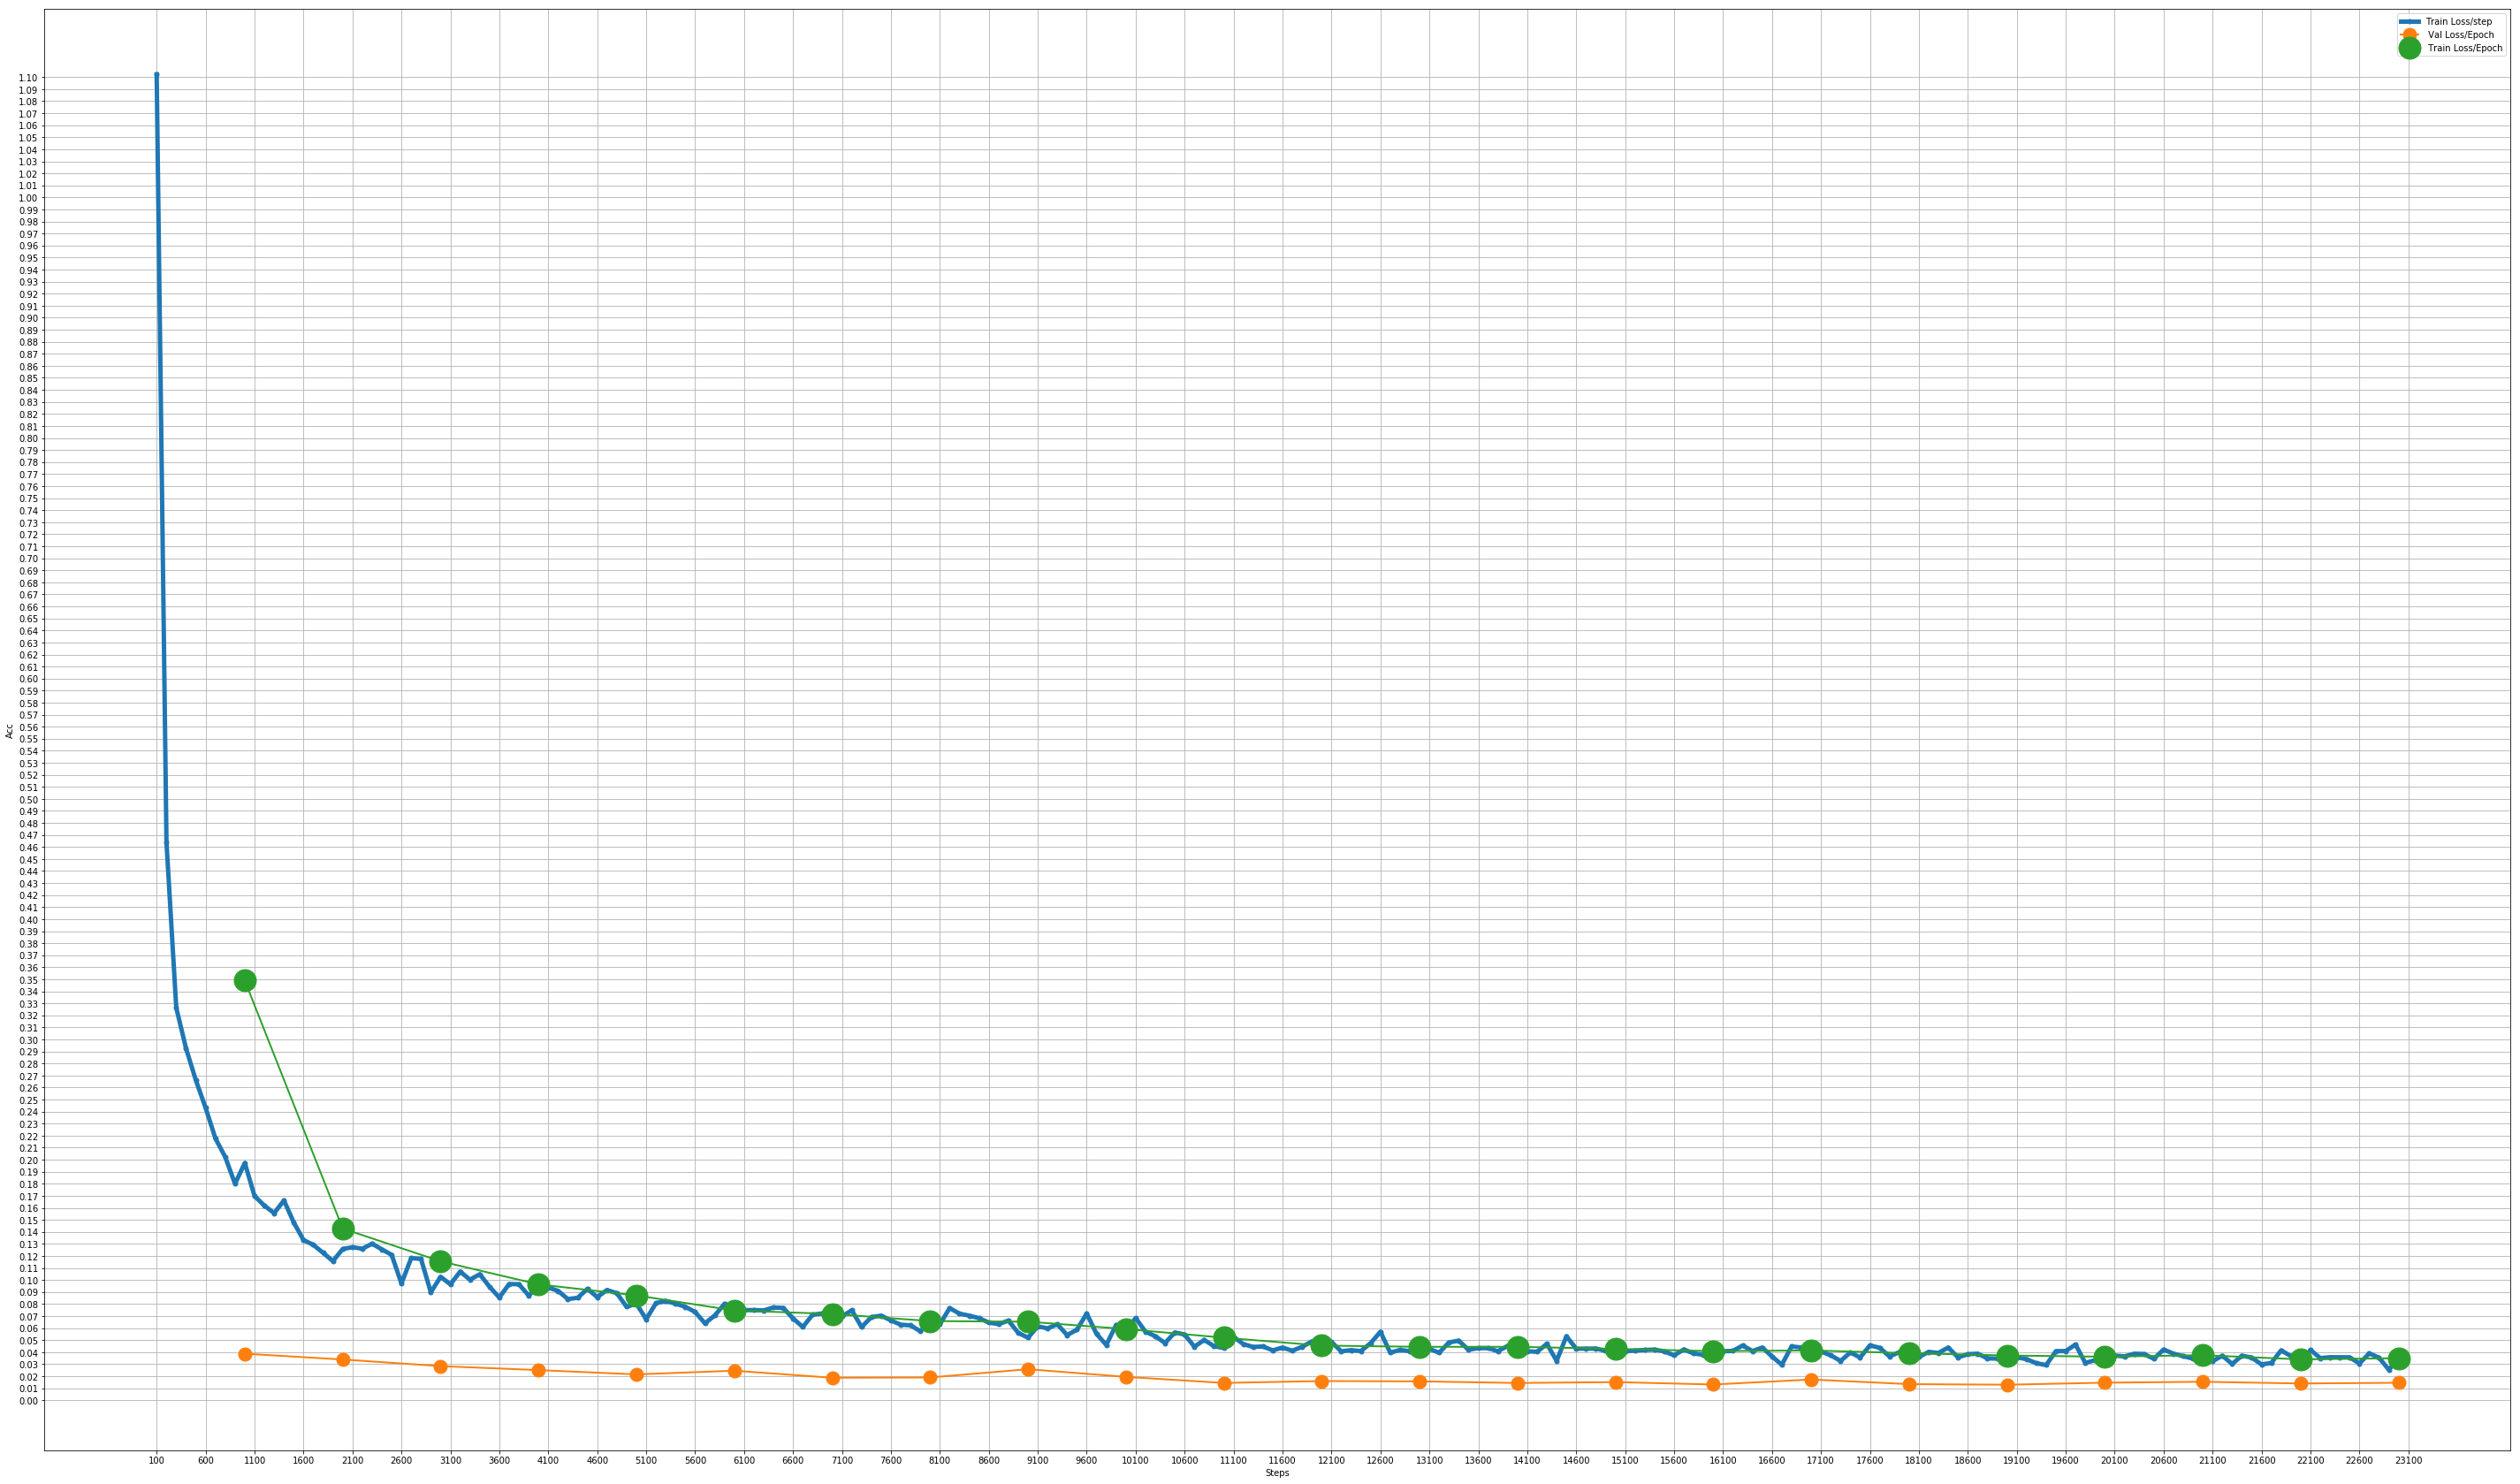

In [28]:
fig = plt.figure(figsize=(50,30))

history_dict=saved_history

train_loss=history_dict['loss']
loss=history_dict['loss_steps']
acc=history_dict['acc_steps']


lineLoss=plt.plot([i*step for i in range(1,len(loss)+1)],[j for j in loss],label="Train Loss/step")
lineValLoss=plt.plot([i*(train_data_size//batch_size) for i in range(1,len(val_loss)+1)],val_loss,label=" Val Loss/Epoch")
lineTrainLoss=plt.plot([i*(train_data_size//batch_size) for i in range(1,len(train_loss)+1)],train_loss,label=" Train Loss/Epoch")


plt.setp(lineLoss,lineWidth=5.0,marker='.',markersize=10.0)
plt.setp(lineValLoss,lineWidth=2.0,marker='.',markersize=30.0)
plt.setp(lineTrainLoss,lineWidth=2.0,marker='.',markersize=50.0)

plt.xlabel('Steps')
plt.ylabel('Acc')
plt.xticks(np.arange(step,len(acc)*(step+1),step*5))
plt.yticks(np.arange(0.0,np.max(loss),0.01))

plt.grid()
plt.legend()
plt.show()

# For test_generator

## Test and Cofusion Matrix

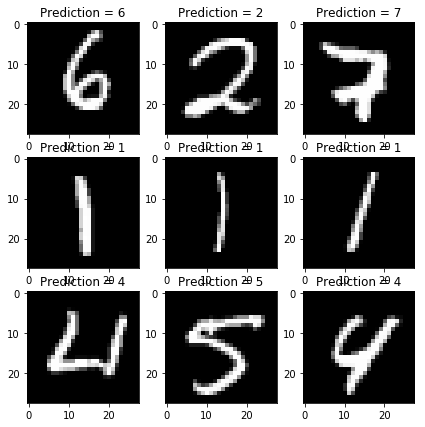

In [15]:
model2=tf.keras.models.load_model(model_name)
test_generator.reset()
gen_pred = model2.predict_generator(test_generator,steps=len(test_generator))
y_pred_gen = np.argmax(gen_pred, axis=1)
plt.figure(figsize=(7,7))
for i in range(1,10):
    plt.subplot(330+i)
    r=np.random.randint(0,len(test_generator))
    plt.title("Prediction = "+str(y_pred_gen[r]))
    plt.imshow(test_generator.x[r].reshape(28,28),cmap=plt.get_cmap('gray'))

Confusion Matrix
[[ 977    0    1    0    0    0    2    0    0    2]
 [   0 1132    2    0    0    0    2    2    0    0]
 [   1    1 1026    0    0    0    0    2    2    1]
 [   0    0    0 1006    0    3    0    0    1    0]
 [   0    0    0    0  979    0    1    0    1    6]
 [   0    0    0    2    0  888    2    1    0    2]
 [   2    0    0    0    1    1  950    0    0    0]
 [   0    2    3    1    0    0    0 1022    1    2]
 [   0    0    0    1    0    0    1    0  968    1]
 [   0    0    0    0    2    0    0    1    1  995]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       982
           1       1.00      0.99      1.00      1138
           2       0.99      0.99      0.99      1033
           3       1.00      1.00      1.00      1010
           4       1.00      0.99      0.99       987
           5       1.00      0.99      0.99       895
           6       0.99      1.00      0.99       

([<matplotlib.axis.YTick at 0x7fe39a9de198>,
 <a list of 10 Text yticklabel objects>)

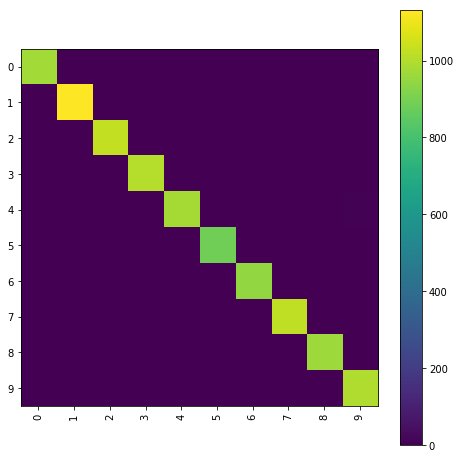

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

print('Confusion Matrix')
cnf_matrix = confusion_matrix(y_pred_gen, np.argmax(test_generator.y,axis=1))
print(cnf_matrix)
print('\nClassification Report')
print(classification_report(y_pred_gen, np.argmax(test_generator.y,axis=1)))

plt.figure(figsize=(8,8))
plt.imshow(cnf_matrix, interpolation='nearest')

plt.colorbar()
classes=[i for i in range(10)]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=90)
plt.yticks(tick_marks, classes)



## Displaying missclassified Digits

number missclassified = 57

some missclassified examples


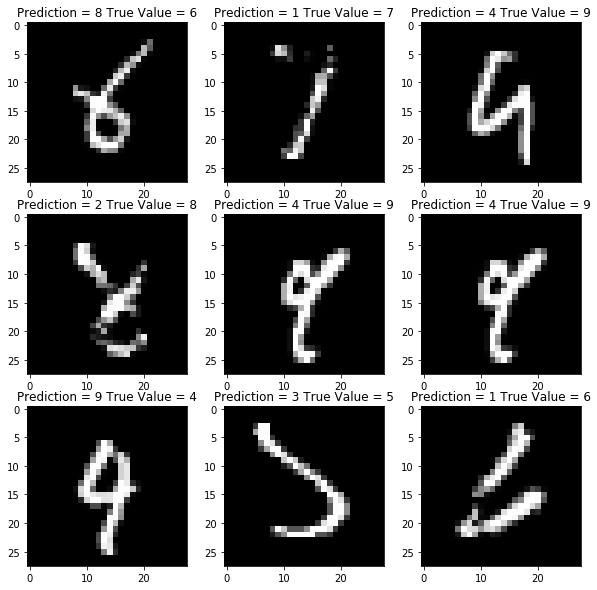

In [17]:
result = np.absolute(np.argmax(test_generator.y,axis=1) - y_pred_gen)
result_indices = np.nonzero(result > 0)[0]
print("number missclassified = "+str(len(result_indices)))
print("\nsome missclassified examples")
plt.figure(figsize=(10,10))
for i in range(1,10):
    plt.subplot(330+i)
    r=np.random.randint(0,len(result_indices))
    x=result_indices[r]
    plt.title("Prediction = "+str(y_pred_gen[x])+" True Value = "+str(np.argmax(test_generator.y,axis=1)[x]))
    plt.imshow(test_generator.x[x].reshape(28,28),cmap=plt.get_cmap('gray'))

# For test_data

### Test and Cofusion Matrix

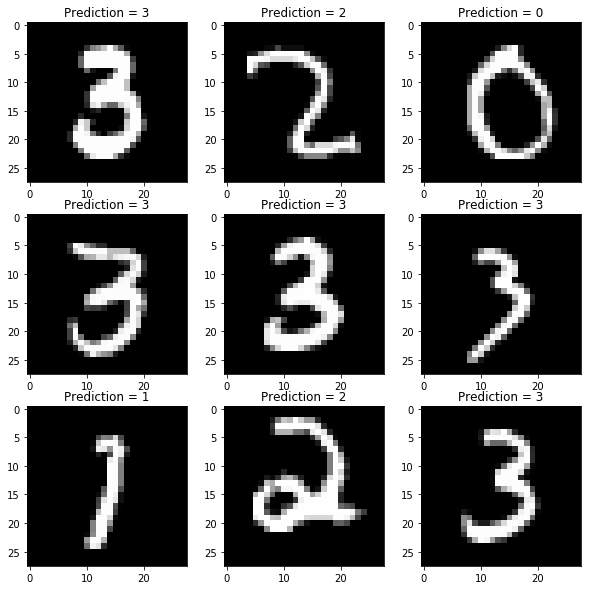

In [18]:
model2=tf.keras.models.load_model(model_name)
test_classes=model2.predict_classes(x_test)
plt.figure(figsize=(10,10))
for i in range(1,10):
    plt.subplot(330+i)
    r=np.random.randint(0,len(x_test))
    plt.title("Prediction = "+str(test_classes[r]))
    plt.imshow(x_test[r].reshape(28,28),cmap=plt.get_cmap('gray'))

Confusion Matrix
[[ 977    0    1    0    0    0    1    0    0    0]
 [   0 1129    0    0    0    0    3    0    0    0]
 [   0    1 1028    0    0    0    0    1    2    0]
 [   0    1    1 1008    0    4    0    0    1    1]
 [   0    0    0    0  980    0    0    0    0    5]
 [   0    0    0    1    0  887    1    0    0    1]
 [   2    1    0    0    0    1  952    0    0    0]
 [   1    3    2    0    0    0    0 1026    1    1]
 [   0    0    0    1    0    0    1    1  969    1]
 [   0    0    0    0    2    0    0    0    1 1000]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       979
           1       0.99      1.00      1.00      1132
           2       1.00      1.00      1.00      1032
           3       1.00      0.99      1.00      1016
           4       1.00      0.99      1.00       985
           5       0.99      1.00      1.00       890
           6       0.99      1.00      0.99       

([<matplotlib.axis.YTick at 0x7fe32b697ba8>,
 <a list of 10 Text yticklabel objects>)

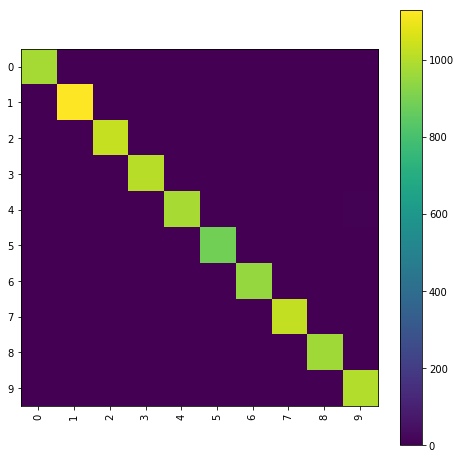

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

print('Confusion Matrix')
cnf_matrix=confusion_matrix(test_classes, np.argmax(y_test,axis=1))
print(cnf_matrix)
print('\nClassification Report')
print(classification_report(test_classes, np.argmax(y_test,axis=1)))

plt.figure(figsize=(8,8))

plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
classes=[i for i in range(10)]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=90)
plt.yticks(tick_marks, classes)



### missclassified examples

number missclassified = 44

some missclassified examples


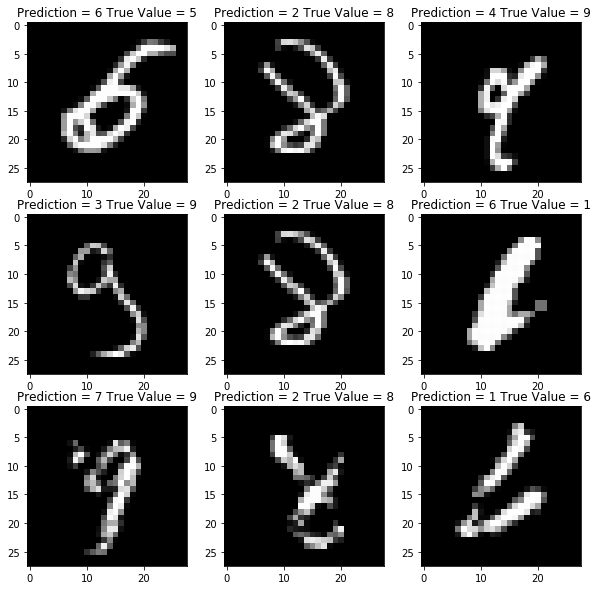

In [20]:
result2 = np.absolute(np.argmax(y_test,axis=1) - test_classes)
result_indices2 = np.nonzero(result2 > 0)[0]
print("number missclassified = "+str(len(result_indices2)))
print("\nsome missclassified examples")

plt.figure(figsize=(10,10))
for i in range(1,10):
    plt.subplot(330+i)
    r=np.random.randint(0,len(result_indices2))
    x=result_indices2[r]
    plt.title("Prediction = "+str(test_classes[x])+" True Value = "+str(np.argmax(y_test,axis=1)[x]))
    plt.imshow(x_test[x].reshape(28,28),cmap=plt.get_cmap('gray'))

# Activation Maximization

In [31]:
from vis.visualization import visualize_activation,visualize_saliency
from vis.utils import utils

Using TensorFlow backend.


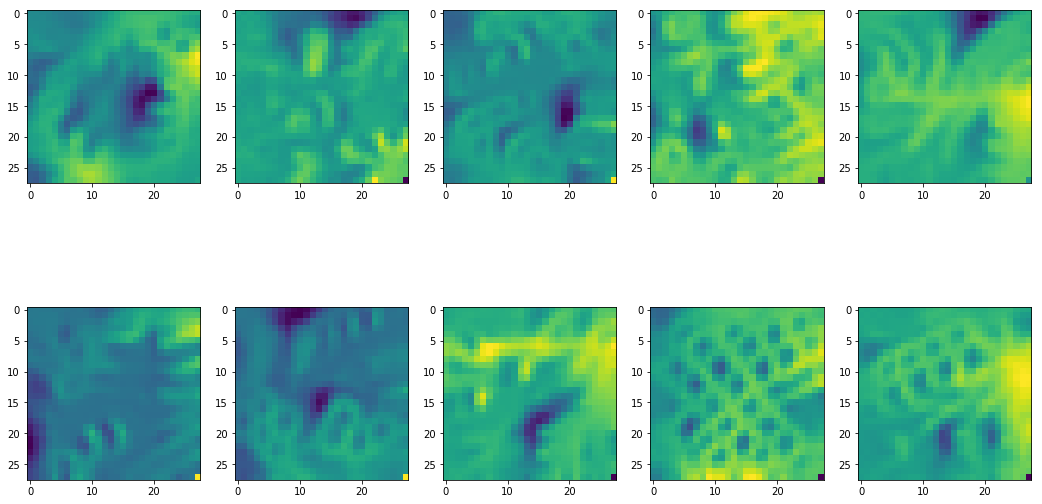

In [32]:
layer_idx=-1
plt.rcParams['figure.figsize']=(18,10)
#layers_idx=utils.find_layer_idx(model2,'max_pooling2d_1')
model2.layers[layer_idx].activation=tf.keras.activations.linear
model2=utils.apply_modifications(model2)
fig, axs = plt.subplots(2, 5)
for i in range(0,10):
    img=visualize_activation(model2,layer_idx,i,input_range=(0.,1.))
    axs[int(i/5), i%5].imshow(img[...,0])

# Saliency Maps 

In [33]:
layer_index=-1
model2=tf.keras.models.load_model(model_name)
model2.layers[layer_index].activation=tf.keras.activations.linear
model2=utils.apply_modifications(model2)

<Figure size 504x216 with 0 Axes>

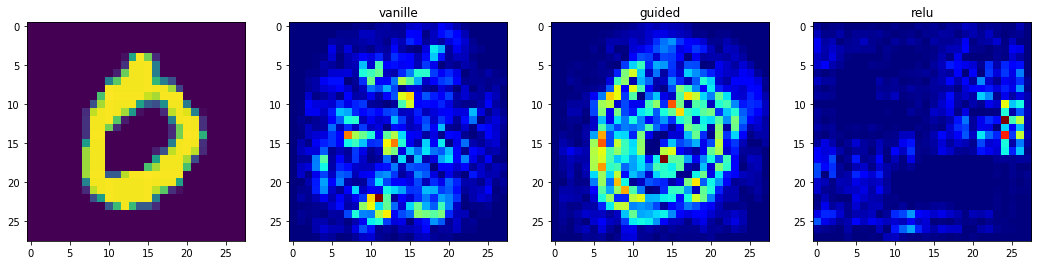

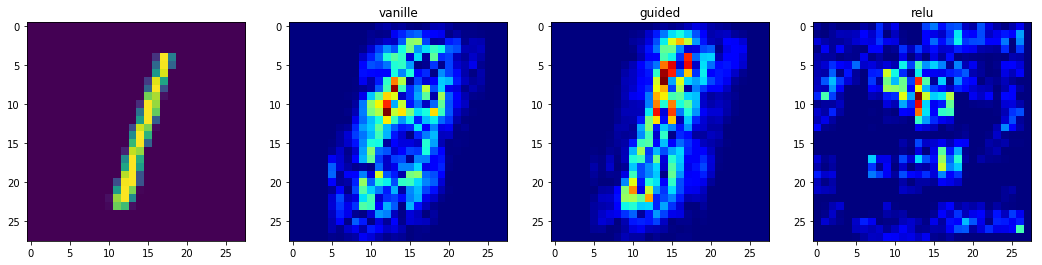

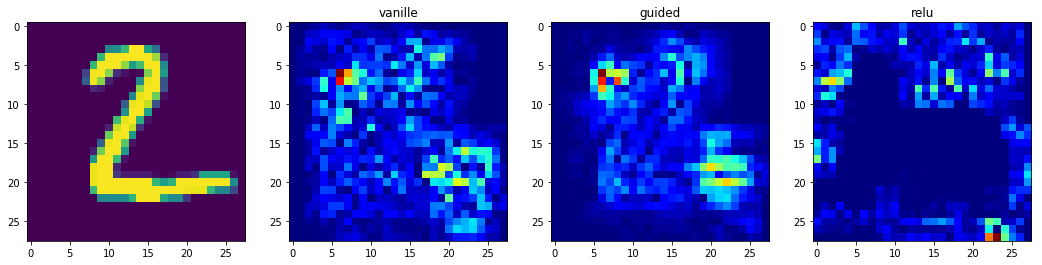

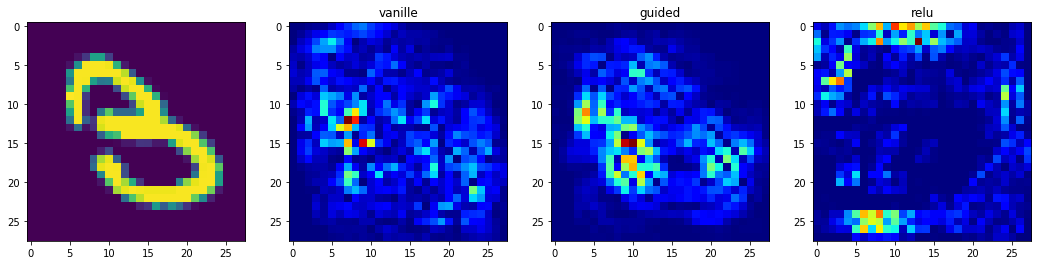

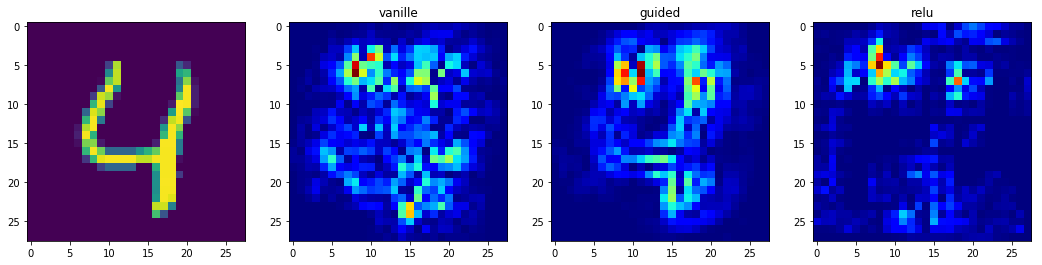

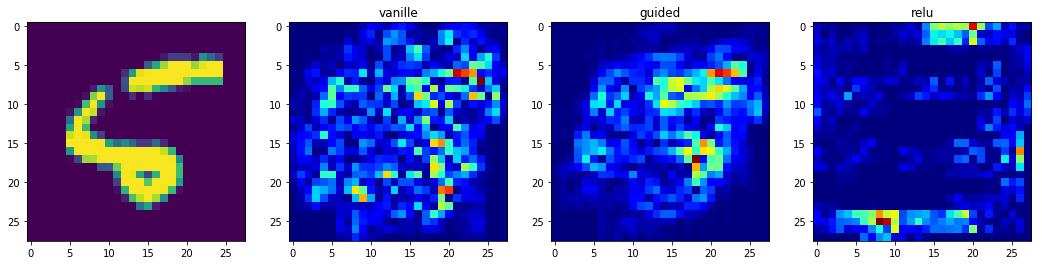

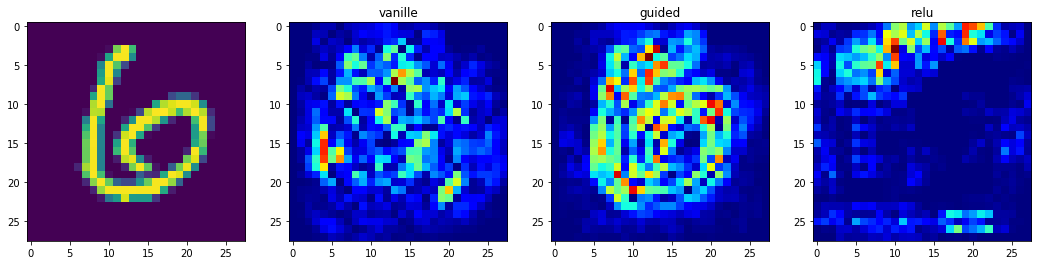

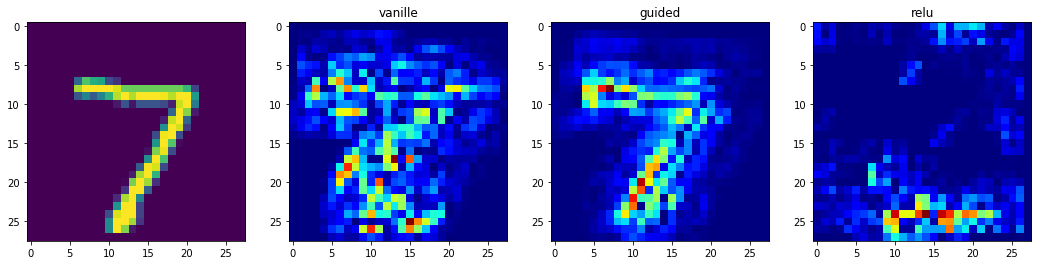

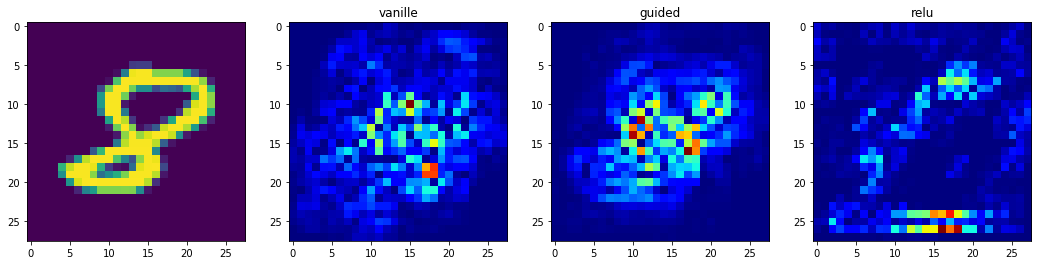

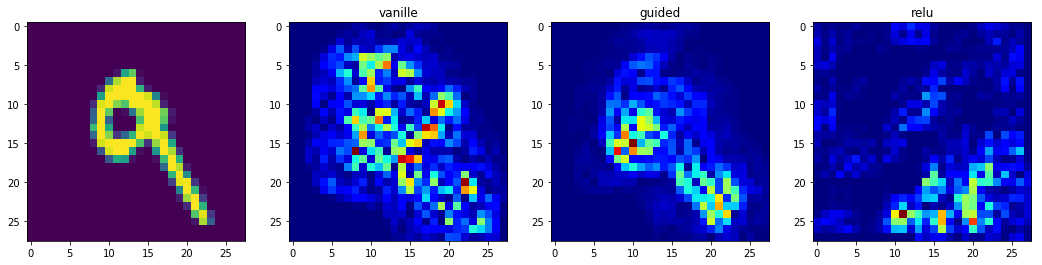

In [34]:
plt.figure(figsize=(7,3))
for i in range(10):
    class_idx=i
    indices=np.where(y_test[:,i]==1.)[0]
    index=indices[0]
    fig, axs = plt.subplots(1, 4)
    axs[0].imshow(x_test[index][...,0])
    for j,modifier in enumerate([None,'guided','relu']):
        grads=visualize_saliency(model2,layer_index,filter_indices=class_idx,seed_input=x_test[index],backprop_modifier=modifier)
        if modifier==None:
            modifier='vanille'
        axs[j+1].set_title(modifier)
        axs[j+1].imshow(grads,cmap='jet')

# Class Activation Maps

In [35]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 11, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7744)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               991360    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

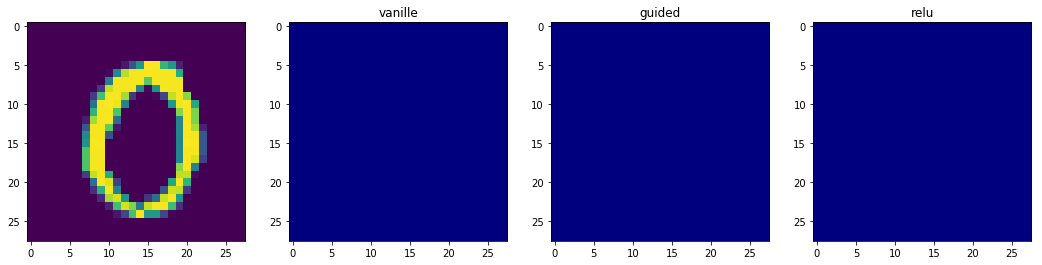

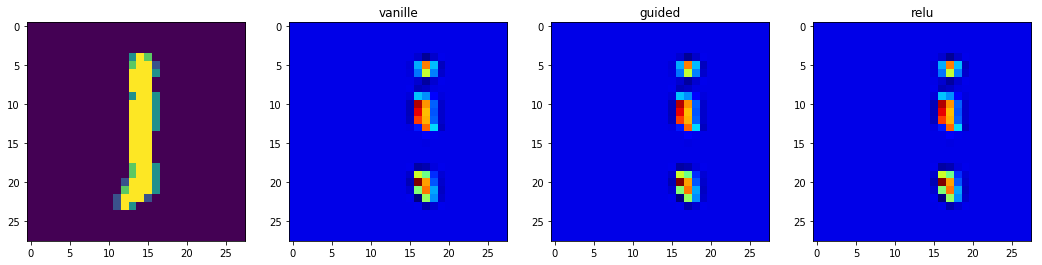

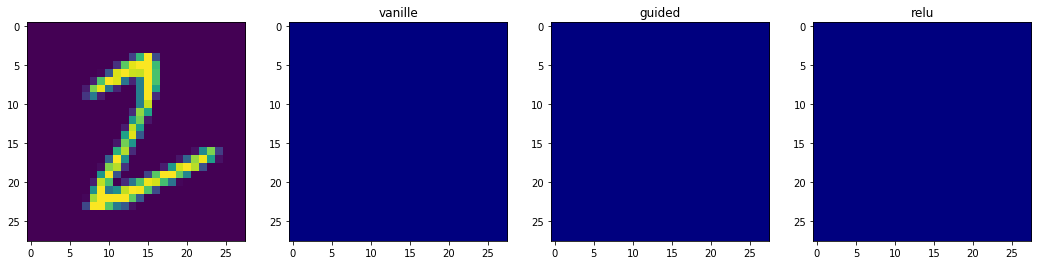

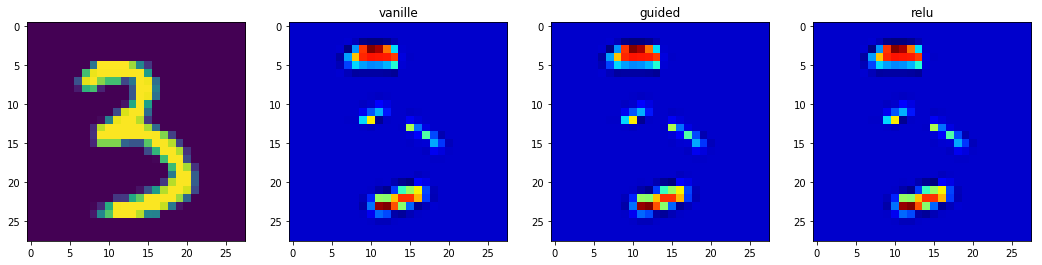

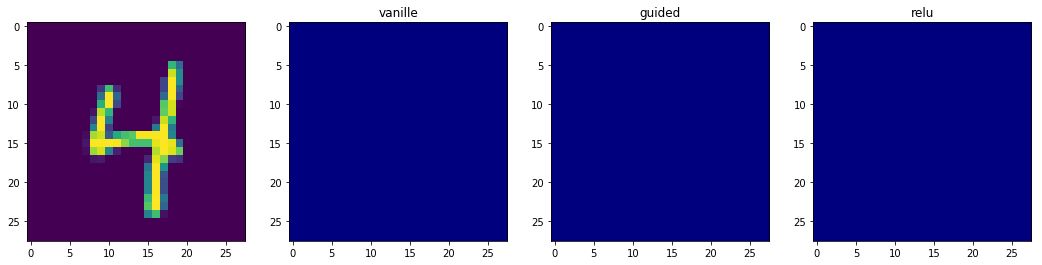

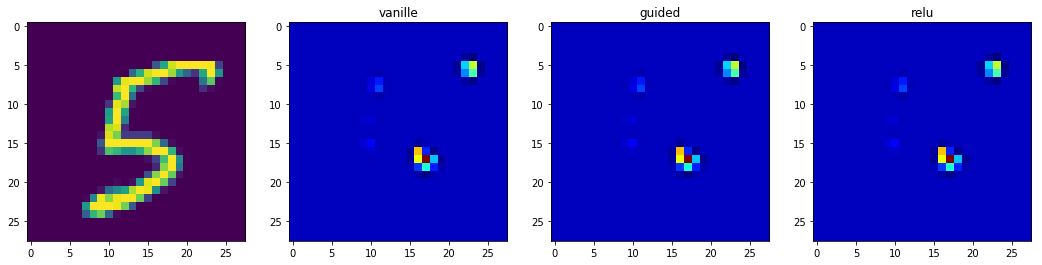

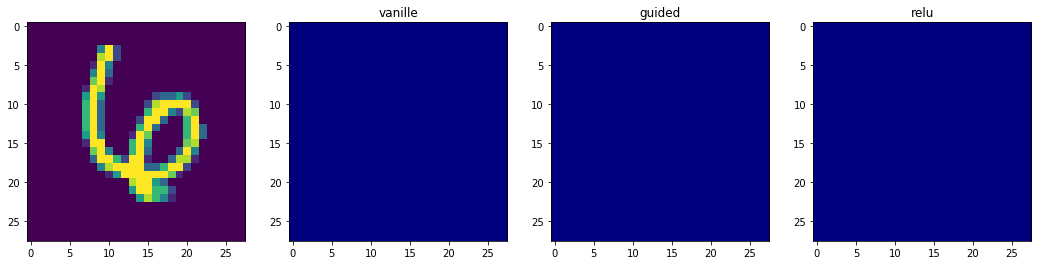

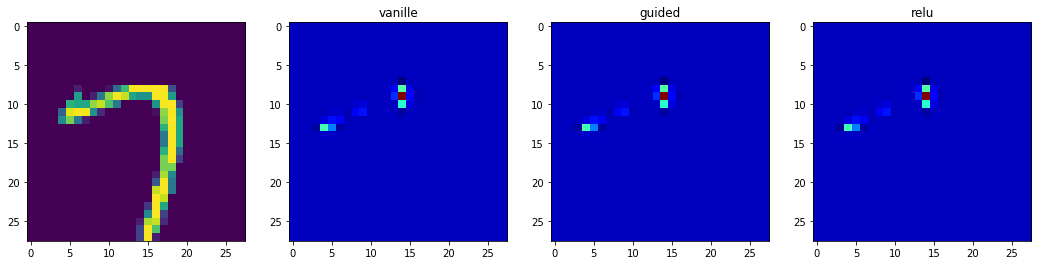

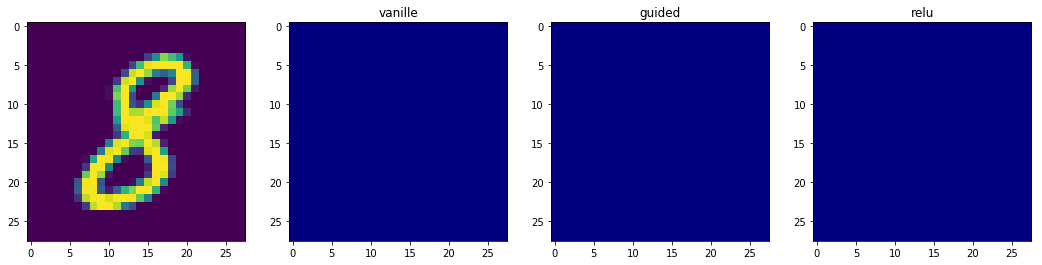

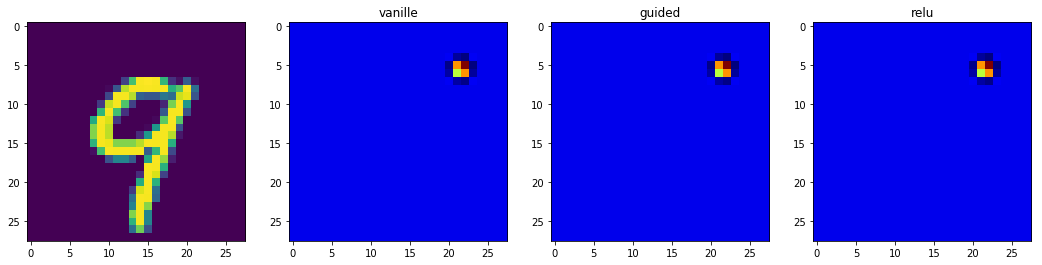

In [37]:
from vis.visualization import visualize_cam
layer_index=2

for i in range(10):
    class_idx=i
    indices=np.where(y_test[:,i]==1.)[0]
    index=indices[2]
    fig, axs = plt.subplots(1, 4)
    axs[0].imshow(x_test[index][...,0])
    for j,modifier in enumerate([None,'guided','relu']):
        grads=visualize_cam(model2,layer_index,filter_indices=class_idx,seed_input=x_test[index],backprop_modifier=modifier)
        if modifier==None:
            modifier='vanille'
        axs[j+1].set_title(modifier)
        axs[j+1].imshow(grads,cmap='jet')

# Filters visualization

In [41]:
model2=tf.keras.models.load_model(model_name)
ind=0
layers_output=[layer.output for layer in model2.layers[:4]]
acitivation_model=tf.keras.models.Model(inputs=model2.input,outputs=layers_output)
activations=acitivation_model.predict(x_test[ind].reshape(1,x_test[ind].shape[0],x_test[ind].shape[1],1))


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


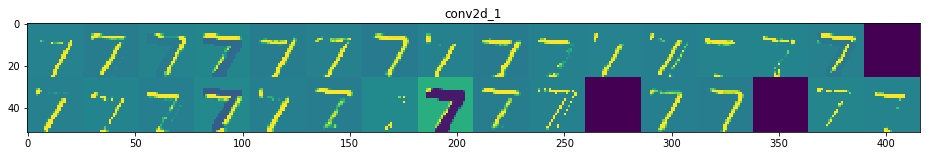

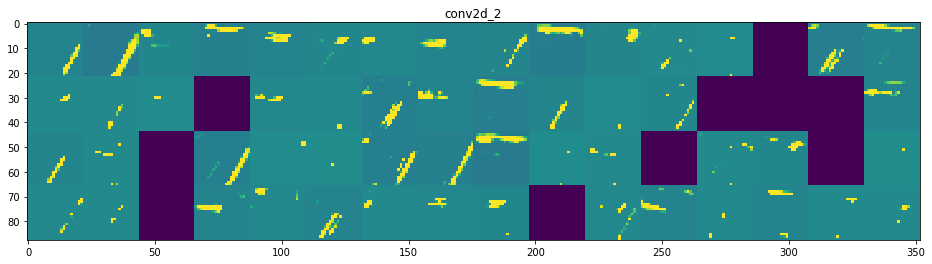

In [42]:
layer_names=[]
for layer in model2.layers[:4]:
    layer_names.append(layer.name)
images_per_row=16
conv_layers_names=[]
for layer in layer_names:
    if 'conv2d' in layer:
        conv_layers_names.append(layer)
for layer_name, layer_activation in zip(conv_layers_names,activations):
    n_features=layer_activation.shape[-1]
    size=layer_activation.shape[1]
    n_cols=n_features//images_per_row
    display_grid=np.zeros((size*n_cols,images_per_row*size))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image=layer_activation[0,:,:,col*images_per_row+row]
            channel_image=channel_image-channel_image.mean()
            channel_image=channel_image/channel_image.std()
            channel_image=channel_image*64
            channel_image=channel_image+128
            channel_image=np.clip(channel_image,0,255).astype('uint8')
            display_grid[col*size:(col+1)*size,row*size:(row+1)*size]=channel_image
    scale=1./size
    plt.figure(figsize=((scale*display_grid.shape[1]),scale*display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid,aspect='auto',cmap='viridis')

    

# Heat Map Of Class Activation

In [43]:
ind=-1
preds = model2.predict(x_test[ind].reshape(1,x_test[ind].shape[0],x_test[ind].shape[1],1))
print(np.argmax(preds[0]))

6


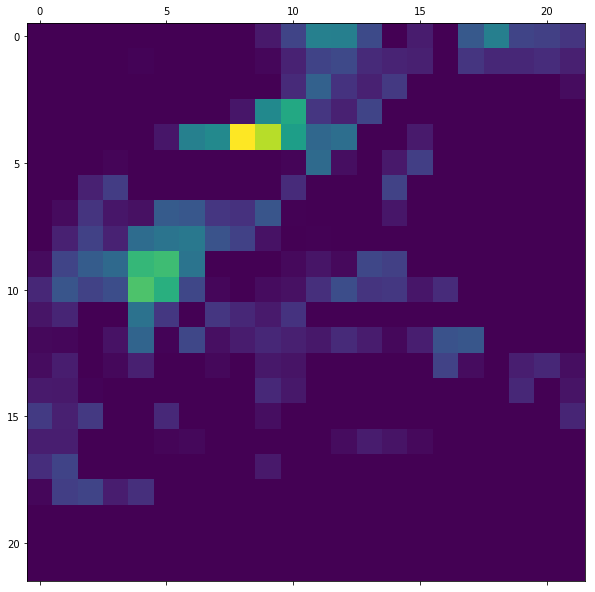

In [44]:

output = model2.output[:,np.argmax(preds[0])]
last_conv_layer = model2.get_layer('conv2d_2')
grads =tf.keras.backend.gradients(output, last_conv_layer.output)[0]
pooled_grads =tf.keras.backend.mean(grads, axis=(0, 1, 2))
iterate =tf.keras.backend.function([model2.input], [pooled_grads, last_conv_layer.output[0]])
x=x_test[ind].reshape(1,x_test[ind].shape[0],x_test[ind].shape[1],1)
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(conv_layer_output_value.shape[2]):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)

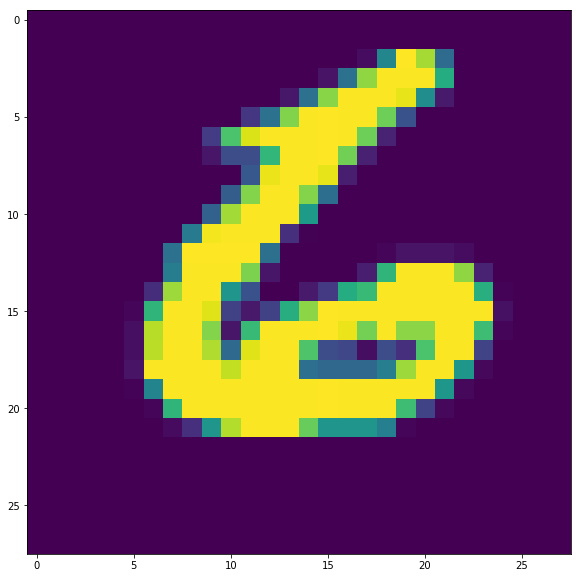

In [45]:
plt.imshow(x_test[ind][...,0])


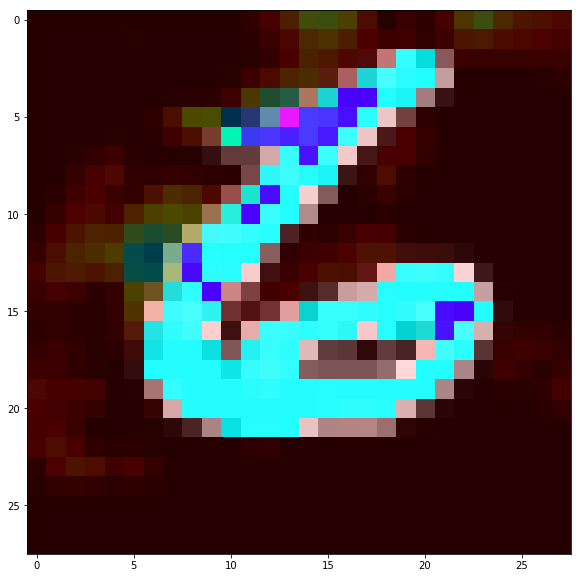

In [46]:
import cv2
heatmap = cv2.resize(heatmap, (28,28))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = heatmap * 0.3 + (255*x_test[ind])
plt.imshow(superimposed_img.astype(np.uint8))